In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Frozen Lake 8*8

Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.

The surface is described using a grid like the following:

SFFF       (S: starting point, safe)

FHFH       (F: frozen surface, safe)

FFFH       (H: hole, fall to your doom)

HFFG       (G: goal, where the frisbee is located)


The episode ends when you reach the goal or fall in a hole. You receive a reward of 100 if you reach the goal, -100 if you fall into the hole, and -0.1 for each step you take.

### Getting Started

Run the following code and observe the result.

In [88]:
%run FrozenLake.ipynb

env = FrozenLakeEnv()
state = env.reset()

for _ in range(5):
    env.render()
    state, reward, done, info = env.step(env.action_space.sample()) # take a random action
    
env.close()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFFFF
FFFFHFFF
FFHFFFFF
FFHFHFFF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFFFF
FFFFHFFF
FFHFFFFF
FFHFHFFF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFFFF
FFFFHFFF
FFHFFFFF
FFHFHFFF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFFFF
FFFFHFFF
FFHFFFFF
FFHFHFFF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFFFF
FFFFHFFF
FFHFFFFF
FFHFHFFF
FFFHFFFG


Run the following code and find the optimal policy using value iteration.

[[2 2 2 2 2 2 1 1]
 [2 2 3 3 2 1 1 1]
 [3 3 0 0 2 2 1 1]
 [3 3 0 1 3 2 1 1]
 [3 0 3 0 0 2 1 1]
 [3 0 0 3 2 2 1 1]
 [3 0 0 3 0 2 1 1]
 [3 0 0 0 2 2 2 0]]


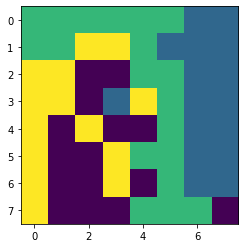

In [118]:
import numpy as np

env.reset()

State_Value = np.zeros(env.nS)
num_iter = 10000
theta = 1e-10
gamma = 1
Policy = np.zeros(env.nS,dtype='int')
delta=1

while delta>theta:
    delta = 0
    for s in range(env.nS):
        V = np.copy(State_Value[s])
        Q = np.zeros(env.nA)
        for a in range(env.nA):
            for p, next_s, r, d in env.P[s][a]:
                Q[a] += p*(r+gamma*State_Value[next_s])
        State_Value[s] = np.max(Q)
        Policy[s] = int(np.argmax(Q))
        delta = max(delta, abs(V-State_Value[s]))
        
print(Policy.reshape(8,8))
plt.imshow(Policy.reshape((8,8)))

Text(0.5, 1.0, 'the env')

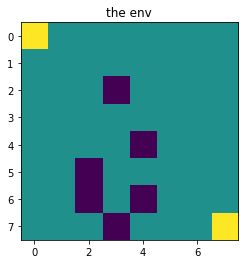

In [119]:
table = np.zeros((8,8))
val = {b'S':1,b'F':0,b'H':-1,b'G':1}
for i in range(8):
    for j in range(8):
        table[i,j] = val[env.desc[i,j]]
plt.imshow(table)
plt.title('the env')
    

Text(0.5, 1.0, 'The moves')

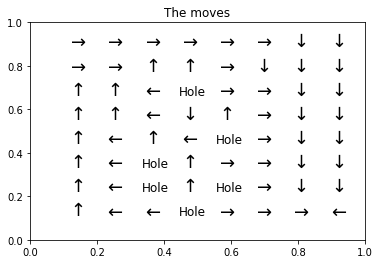

In [121]:
move = {2:'$\\rightarrow$',1:'$\\downarrow$',3:'$\\uparrow$',0:'$\\leftarrow$'}
d=1/9
for i in range(1,9):
    for j in range(1,9):
        if table[i-1,j-1]==-1:
            plt.text(d*j,1-d*i,'Hole',size=12)
            continue
        plt.text(d*j,1-d*i,move[Policy.reshape((8,8))[i-1,j-1]],size=18)
plt.title("The moves")    


### Q-Learning

Find the best policy using Q-Learning algorithm.
Use an epsilon greedy policy with decaying epsilon.

In [90]:
env.P[1]

{0: [(0.15, 1, -0.1, False), (0.7, 0, -0.1, False), (0.15, 9, -0.1, False)],
 1: [(0.15, 0, -0.1, False), (0.7, 9, -0.1, False), (0.15, 2, -0.1, False)],
 2: [(0.15, 9, -0.1, False), (0.7, 2, -0.1, False), (0.15, 1, -0.1, False)],
 3: [(0.15, 2, -0.1, False), (0.7, 1, -0.1, False), (0.15, 0, -0.1, False)]}

In [91]:
alpha = 0.2

In [92]:
np.random.randint(3, size= (8,8))

array([[0, 1, 2, 0, 1, 2, 0, 0],
       [2, 2, 1, 2, 0, 1, 0, 2],
       [2, 0, 2, 0, 0, 2, 2, 2],
       [2, 1, 0, 0, 0, 2, 2, 1],
       [2, 2, 0, 0, 2, 2, 0, 0],
       [2, 0, 0, 0, 0, 0, 1, 2],
       [2, 1, 1, 2, 2, 0, 1, 2],
       [1, 1, 0, 1, 0, 0, 2, 2]])

In [93]:
env.nA
env.step(2)

(1, -0.1, False, {'prob': 0.7})

In [94]:
def row_col_finder(state):
    i = state//8
    j = state%8
    return i,j

In [95]:
row_col_finder(0)

(0, 0)

In [136]:
import numpy as np

#initialize the algorithm parameters, state-action values, and policy  
alpha = 0.2
ep = 0.73
policy = np.random.randint(4,size = (8,8))
Q = np.ones((8,8,4))*10

#define epsilon-greedy function
def ep_greedy(Q,ep):
    rand = np.random.random()
    if rand < 1-ep:
        return np.argmax(Q)
    return np.random.randint(env.nA)
   
#start the learning loop
for n in range(num_iter):
    
    #initialize the first state 
    state = 0
    env.reset() 
    done = False
    
    #start the episode:
    while done == False:
        
        #get the next action using the soft policy and execute it and get the reward:
        Action = ep_greedy(Q[row_col_finder(state)],ep)
        state_prime, reward, done, info = env.step(Action)
        
        Qs_Sprime = []
        for a in range(env.nA):
            Qs_Sprime.append(Q[row_col_finder(state_prime)][a])
    
        #update the state-action value Q(s,a) and go to the next state:

        Q[row_col_finder(state)][Action] += alpha*(reward + np.max(Qs_Sprime)-Q[row_col_finder(state)][Action])
        #print(reward )
        policy[row_col_finder(state)]=Action
        state = state_prime
        
            
    #update epsilon:
    ep *= 0.999
    

Print what the best action in each state is.

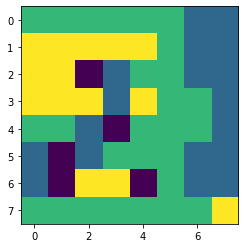

In [137]:
plt.imshow(policy)


Text(0.5, 1.0, 'the env')

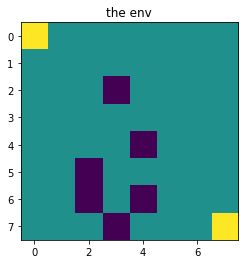

In [138]:
table = np.zeros((8,8))
val = {b'S':1,b'F':0,b'H':-1,b'G':1}
for i in range(8):
    for j in range(8):
        table[i,j] = val[env.desc[i,j]]
plt.imshow(table)
plt.title('the env')
    

Text(0.5, 1.0, 'Value update')

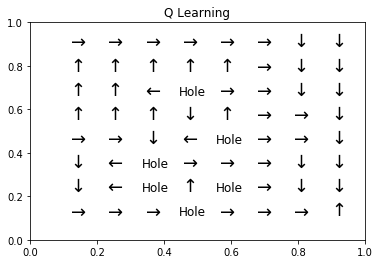

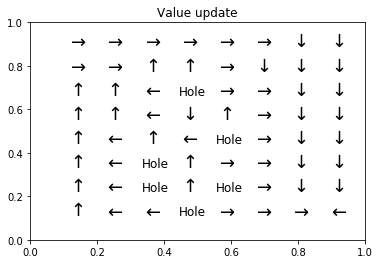

In [139]:
move = {2:'$\\rightarrow$',1:'$\\downarrow$',3:'$\\uparrow$',0:'$\\leftarrow$'}
d=1/9
for i in range(1,9):
    for j in range(1,9):
        if table[i-1,j-1]==-1:
            plt.text(d*j,1-d*i,'Hole',size=12)
            continue
        plt.text(d*j,1-d*i,move[policy[i-1,j-1]],size=18)
plt.title("Q Learning")    
plt.figure()
move = {2:'$\\rightarrow$',1:'$\\downarrow$',3:'$\\uparrow$',0:'$\\leftarrow$'}
d=1/9
for i in range(1,9):
    for j in range(1,9):
        if table[i-1,j-1]==-1:
            plt.text(d*j,1-d*i,'Hole',size=12)
            continue
        plt.text(d*j,1-d*i,move[Policy.reshape((8,8))[i-1,j-1]],size=18)
plt.title("Value update")    


Show your result and print the total reward that you recieved.

### Sarsa

Find the best policy using Sarsa algorithm.
Use an epsilon greedy policy with decaying epsilon.

In [147]:
import numpy as np

#initialize the algorithm parameters, state-action values, and policy
ep = 0.6
aplha = 0.2
gamma = 1
policy = np.random.randint(env.nA, size = (8,8))
Q = np.zeros((8,8,4))

#define epsilon-greedy function
def ep_greedy(Q,ep):
    rand = np.random.random()
    if rand <ep:
        return np.argmax(Q)
    return np.random.randint(env.nA)

#start the learning loop    
for n in range(num_iter):
    #initialize the first state and get the next action using the soft policy derived from Q-values
    state = 0
    env.reset()
    done = False
    Action = ep_greedy(Q[row_col_finder(state)],ep)
    #start the episode:
    while done == False: 
        #execute the selected action, go to the next state, get the reward
        state_prime , reward, done, info = env.step(Action)
        #and select the next action using the soft policy derived from Q-values
        Action_prime = ep_greedy(Q[row_col_finder(state_prime)],ep)
        #finaly update the Q-values:
        Q[row_col_finder(state)][Action] += alpha*(reward + gamma*Q[row_col_finder(state_prime)][Action_prime] - Q[row_col_finder(state)][Action])
        state = state_prime
        Action = Action_prime
    #update epsilon    
    ep *= 0.999

Print what the best action in each state is.

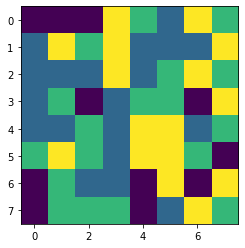

In [148]:
plt.imshow(policy)

Show your result and print the total reward that you recieved.

Text(0.5, 1.0, 'Value update')

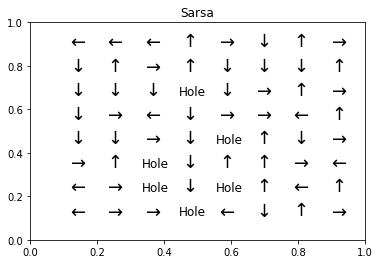

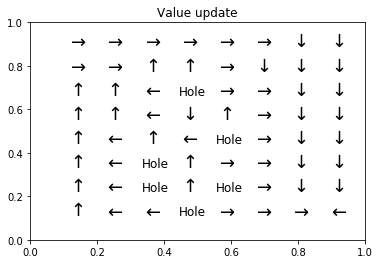

In [150]:
move = {2:'$\\rightarrow$',1:'$\\downarrow$',3:'$\\uparrow$',0:'$\\leftarrow$'}
d=1/9
for i in range(1,9):
    for j in range(1,9):
        if table[i-1,j-1]==-1:
            plt.text(d*j,1-d*i,'Hole',size=12)
            continue
        plt.text(d*j,1-d*i,move[policy[i-1,j-1]],size=18)
plt.title("Sarsa")    
plt.figure()
move = {2:'$\\rightarrow$',1:'$\\downarrow$',3:'$\\uparrow$',0:'$\\leftarrow$'}
d=1/9
for i in range(1,9):
    for j in range(1,9):
        if table[i-1,j-1]==-1:
            plt.text(d*j,1-d*i,'Hole',size=12)
            continue
        plt.text(d*j,1-d*i,move[Policy.reshape((8,8))[i-1,j-1]],size=18)
plt.title("Value update")    


### Off-Policy Monte-Carlo Control

Find the best policy using off-policy monte-carlo algorithm.
Use an epsilon greedy policy with decaying epsilon.

In [ ]:
import numpy as np

#initialize the algorithm parameters, state-action values, policy, and C(s,a)


#define epsilon-greedy function
def ep_greedy(Q,ep):

    return policy

#define the episode generator function
def episode_generator(policy):
    done = False
    state = []
    action = []
    reward = []
    
    
    return np.asarray(state), np.asarray(action), np.asarray(reward)
    

#start the learning loop    
for n in range(num_iter):
    
    #update the soft policy and generate the episode based on it
    
    
    #start updating the Q-values from the last state
    #remember to check whether the chosen action is equivalent to the action that is slected by the greedy policy 
    
    

    #update epsilon
    
    

Print what the best action in each state is.

Show your result and print the total reward that you recieved.

### Sarsa($\lambda$)

Find the best policy using Sarsa($\lambda$) algorithm.
Use an epsilon greedy policy with decaying epsilon.

In [ ]:
import numpy as np

#initialize the algorithm parameters, state-action values, and policy


#define epsilon-greedy function
def ep_greedy(Q,ep):

    return policy

#start the learning loop    
for n in range(num_iter):
    
    #initialize the first state and get the next action using the soft policy derived from Q-values
    #initialize eligibility traces
    
    
    #start the episode:
    while done == False:
        
        #execute the selected action, go to the next state, get the reward
        #and select the next action using the soft policy derived from Q-values
        #finaly calculate delta and upate the eligibility trace:
        
        
        #for all the state-action pairs so far, update Q-values and eligibility traces
        
        
        # go to the next state
        
        
    #update epsilon    
    
    

Print what the best action in each state is.

Show your result and print the total reward that you recieved.